<a href="https://colab.research.google.com/github/Divesh2201/BCT-IA2/blob/master/DSF%20Homework%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 2: Exploratory Data Analysis in iPython
### Divesh Thakker - 115642579

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/CSE519

/content/drive/MyDrive/CSE519


# Download data from Kaggle

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse
files.upload()

Saving kaggle.json to kaggle (6).json


{'kaggle (6).json': b'{"username":"diveshsbu","key":"3fd14be4f69867868e1ddeeabf2daecd"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
!kaggle competitions download -c commonlit-evaluate-student-summaries

commonlit-evaluate-student-summaries.zip: Skipping, found more recently modified local copy (use --force to force download)


# Extract data and install packages (regardless of data acquisition method)

In [54]:
!unzip commonlit-evaluate-student-summaries.zip

Archive:  commonlit-evaluate-student-summaries.zip
replace prompts_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


In [9]:
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn

## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

## Question 1: Merge two dataframes according to use_cols

In [12]:
summaries_train_df = pd.read_csv("summaries_train.csv")
prompts_train_df = pd.read_csv("prompts_train.csv")
merged_df = pd.merge(summaries_train_df, prompts_train_df)
merged_df.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...


## **Section 2: Features (Q2 and Q3, 25 points total)**

## Question 2: Extract first five features

In [13]:
# Simple word counter function returning the sum (or length) or the number of words present in a text source
def count_words(text):
# words is a list object containing strings of individual words
    words = text.split()
    return len(words)

In [14]:
# Using set we can extend the above function to count distinct words
def count_distinct_words(text):
  return len(set(text.split()))

In [15]:
# Again using set and intersection, we can count common words among two data sources
def count_commons(text1, text2):
  words1 = text1.split()
  words2 = text2.split()
  distinct1 = set(words1)
  distinct2 = set(words2)
  commons = distinct1.intersection(distinct2)
  return len(commons)

In [16]:
# This block uses the above introduced functions.
feature_table = pd.DataFrame()
# We are creating the seven features which are specified in question two.
feature_table['total_words_text'] = merged_df['text'].apply(count_words)
feature_table['total_words_prompt_text'] = merged_df['prompt_text'].apply(count_words)
feature_table['distinct_words_text'] = merged_df['text'].apply(count_distinct_words)
feature_table['distinct_words_prompt_text'] = merged_df['prompt_text'].apply(count_distinct_words)
feature_table['commons_text_prompt_text'] = merged_df.apply(
    lambda row: count_commons(row['text'], row['prompt_text']),
    axis = 1
)
feature_table['commons_text_prompt_question'] = merged_df.apply(
    lambda row: count_commons(row['text'], row['prompt_question']),
    axis = 1
)
feature_table['commons_text_prompt_title'] = merged_df.apply(
    lambda row: count_commons(row['text'], row['prompt_title']),
    axis = 1
)

In [17]:
# By executing the above block we have created seven features.
# Now in this block we will validate weather our features have the correct values calculated in them.
feature_table.head()

,total_words_text,total_words_prompt_text,distinct_words_text,distinct_words_prompt_text,commons_text_prompt_text,commons_text_prompt_question,commons_text_prompt_title
0,61,596,51,300,21,5,1
1,203,596,138,300,46,9,3
2,60,596,50,300,29,5,1
3,76,596,59,300,36,7,1
4,27,596,25,300,15,5,1


## Question 3: Custom five other numeric features

**Feature 1:** Weighted Average Word Lengths for prompt text and summary text. The summary text and prompt text have 75% to 25% weightage.

**Reasoning:** The higher the average is, the longer the words are in general, which indicates a more complex vocabulary. This would correspond to a high positive correlation to the 'wording' output.

In [18]:
# This function calculates the average word length and then applies the specified weight
def compute_weighted_average_word_length(text, weight):
  words = text.split()
  sum_of_chars = 0
  for word in words:
    sum_of_chars += len(word)
  avg = sum_of_chars/len(words)
  return avg*weight

In [19]:
feature_table['weighted_average_word_length_text_prompt_text'] = merged_df.apply(
    lambda row: compute_weighted_average_word_length(row['text'], 0.75) + compute_weighted_average_word_length(row['prompt_text'], 0.25),
    axis = 1
)

**Feature 2:** Flesch reading ease ratio for summary text to prompt text.

**Reasoning:** The higher the ratio is, the more readable is the summary text in accordance to the given prompt text. This feature is also very useful to compare different students for their 'wording' metric on a particular prompt text. This feature corresponds to a high positive correlation to the 'wording' metric. It also correlates with the 'content' metric positively.

In [20]:
# A raw function to count the number of syllables a word contains.
# The validation of this function is based on references [5].
def count_syllables(word):
    word = word.lower()
    if len(word) <= 3:
        return 1
    count = 0
    vowels = "yaeiou"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if word.endswith("le"):
        count += 1
    if count == 0:
        count += 1
    return count

In [21]:
def compute_flesch_readability(text):
    # The first part involves computing the average number of words per sentence
    sentences = text.split('.')
    total_sentences = len(sentences)
    total_words = sum(len(sentence.split()) for sentence in sentences)
    average_words_per_sentence = total_words / total_sentences

    # In the second part we calculate the average number of syllables per word
    words = text.split()
    total_syllables = sum(count_syllables(word) for word in words)
    average_syllables_per_word = total_syllables / len(words)

    # Finally we apply the formulae
    flesch_reading_ease = 206.835 - 1.015 * average_words_per_sentence - 84.6 * average_syllables_per_word
    return flesch_reading_ease

In [22]:
feature_table['flesch_text_to_prompt_text_ratio'] = merged_df.apply(
    lambda row: compute_flesch_readability(row['text']) / compute_flesch_readability(row['prompt_text']),
    axis = 1
)

**Feature 3:** Percent Overlap, i.e. percentage of words (excluding stop words) in the summary text that overlap with the prompt text

**Reasoning:** The higher the percentage is, the more accurately the content in the text summarizes its prompt text. This feature corresponds to a high positive correlation with the 'content' metric.

In [23]:
# Because we are going to work with stop words, importing necessary libraries
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
def remove_stop_words(text):
  stop_words = set(stopwords.words('english'))
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  filtered_text = " ".join(filtered_words)
  return filtered_text

In [25]:
feature_table['percent_text_prompt_text_overlap'] = merged_df.apply(
    lambda row: count_commons(remove_stop_words(row['text']), remove_stop_words(row['prompt_text']))*100 / len(remove_stop_words(row['text'])),
    axis = 1
)

**Feature 4:** Sentiment analysis - this feature computes the similarity in sentiment for the prompt and summary text.  

**Reasoning:** By computing the sentiment analysis score for both the prompt and summary, we can calculate the difference in sentiment scores. The closer the difference is to zero, the better the summary represents the prompt. It has a high negative correlation with the 'content' metric. A value close to zero means more better content for the summary and vice versa.

In [26]:
# Because we are going to analyze sentiment, importing necessary libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [27]:
def extract_sentiment(text):
  analyzer = SentimentIntensityAnalyzer()
  sentiment = analyzer.polarity_scores(text)
  sentiment_score = sentiment['compound']
  return sentiment_score

In [28]:
feature_table['sentiment_difference_text_prompt_text'] = merged_df.apply(
    lambda row: abs(extract_sentiment(row['text']) - extract_sentiment(row['prompt_text'])),
    axis = 1
)

**Feature 5:** Coleman Liau readability ratio for summary to prompt text.

**Reasoning:** The higher the ratio is, the more complicated to understand the summary text is in accordance to the given prompt text. This feature plays a key role to compare different students for their 'wording' metric on a particular prompt text. It corresponds to a high positive correlation to the 'wording' metric and a relatively good positive correspondence with the 'content' metric.

In [29]:
def calculate_coleman_liau_readability(text):
    # In the first part we calculate the number of letters, words, and sentences in the input text
    num_letters = sum(c.isalpha() for c in text)
    num_words = len(text.split())
    num_sentences = text.count('.') + text.count('!') + text.count('?')

    # The second part computes the average number of letters and words per 100 words (as defined in [6] wikipedia)
    L = (num_letters / num_words) * 100
    S = (num_sentences / num_words) * 100

    coleman_liau_index = 0.0588 * L - 0.296 * S - 15.8
    # For our data these values lie between 0 and 13+
    return coleman_liau_index

In [30]:
feature_table['coleman_liau_text_to_prompt_text_ratio'] = merged_df.apply(
    lambda row: calculate_coleman_liau_readability(row['text']) / calculate_coleman_liau_readability(row['prompt_text']),
    axis = 1
)

In [31]:
# In the above blocks, we have developed five custom features of our own.
# Now in this block we will check how they compare amongst each other and the nature of values they hold.
feature_table.head()

,total_words_text,total_words_prompt_text,distinct_words_text,distinct_words_prompt_text,commons_text_prompt_text,commons_text_prompt_question,commons_text_prompt_title,weighted_average_word_length_text_prompt_text,flesch_text_to_prompt_text_ratio,percent_text_prompt_text_overlap,sentiment_difference_text_prompt_text,coleman_liau_text_to_prompt_text_ratio
0,61,596,51,300,21,5,1,4.757165,1.197154,1.960784,0.2070,0.887656
1,203,596,138,300,46,9,3,5.009245,1.123670,2.470588,0.0219,0.938944
2,60,596,50,300,29,5,1,4.815772,1.380990,5.462185,0.9915,0.786323
3,76,596,59,300,36,7,1,4.951298,1.113511,5.844156,0.3107,1.004977
4,27,596,25,300,15,5,1,4.546327,1.524485,5.882353,0.9915,0.663059


## **Section 3: Content and Wording (Q4, 10 points)**

In this section we will create plots to visualize the content and wording metrics in our given data.

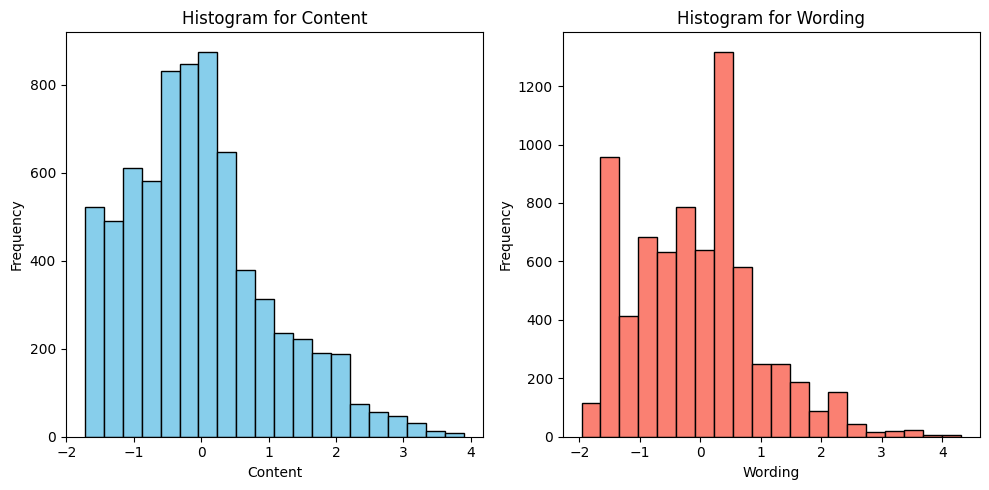

In [32]:
# In this block we would visualize data as a collective of all the prompts
# In the later sections we will divide the data into individual prompts and visualize
# The first figure will visualize the 'content' metric
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(merged_df['content'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Content')
plt.ylabel('Frequency')
plt.title('Histogram for Content')

# The second histogram will visualize the 'wording' metric
plt.subplot(1, 2, 2)
plt.hist(merged_df['wording'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Wording')
plt.ylabel('Frequency')
plt.title('Histogram for Wording')

plt.tight_layout()
plt.show()

***Observations and Inferences:*** The above histograms represent the content and wordings across all four prompts for the given data. We observe that the range of values for content vary from around -1.7 to 3.9 and that of wordings vary from -1.95 to 4.3.

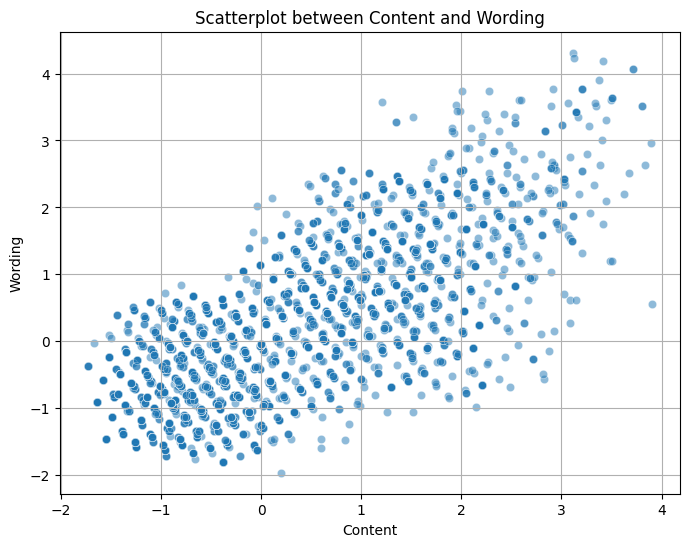

In [33]:
# This section will visualize all the data points for both content and wording using a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='content', y='wording', alpha=0.5)
plt.xlabel('Content')
plt.ylabel('Wording')
plt.title('Scatterplot between Content and Wording')
plt.grid(True)
plt.show()

***Observations and Inferences:*** The above scatterplot is an excellent visualization of the content and wording metrics. We can note how both are positively related with each other, i.e. both increase almost linearly. If we draw an imaginary increasingly linear correlation line (which corresponds to a correlation value of +1), we can observe a standard deviation in the data points. The next plot visualizes the same.

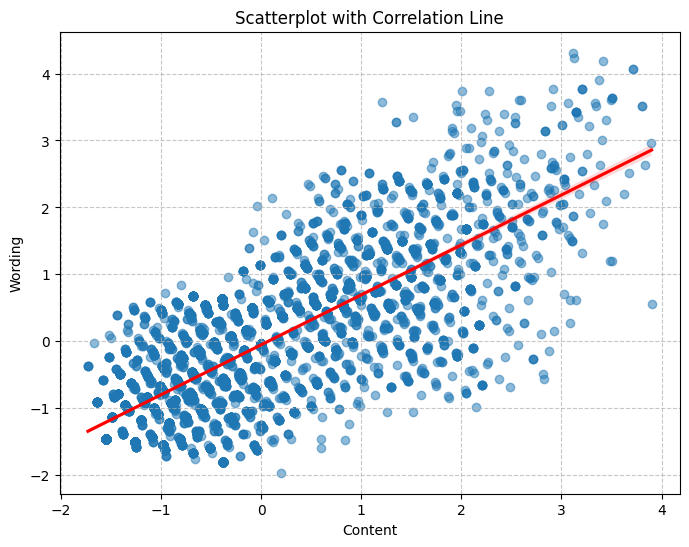

In [34]:
# We will use the same scatterplot as illustrated in the earlier block.
# But this block will specifically focus on the correlation line.
# We will plot the correlation aspect in the previous scatterplot to analyze various correlation traits across the x axis.
plt.figure(figsize=(8, 6))
sns.regplot(data=merged_df, x='content', y='wording', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

plt.xlabel('Content')
plt.ylabel('Wording')
plt.title('Scatterplot with Correlation Line')

plt.grid(True, linestyle='--', alpha=0.7)

***Observations and Inferences:*** The red correlation line shows us the ideal senario for a positive correlation between the x and y axes. We can with the help of the above plot analyze how spread our data points are from the correlation line representing +1.

It is also insightful to observe that the values of content and wording around -1 to +1 have a lower spread as compared to values in the range of 2 to 4, which consists of many outliers. We estimate a correlation of 0.68 from the above graph for the two metrics.

In [35]:
# Now utilizing the 'corr()' pandas function, we can see that our estimate was close to the actual value
merged_df['content'].corr(merged_df['wording'])

0.7513804859701969

Text(0.5, 1.0, 'Overlapping Histogram for Content and Wording')

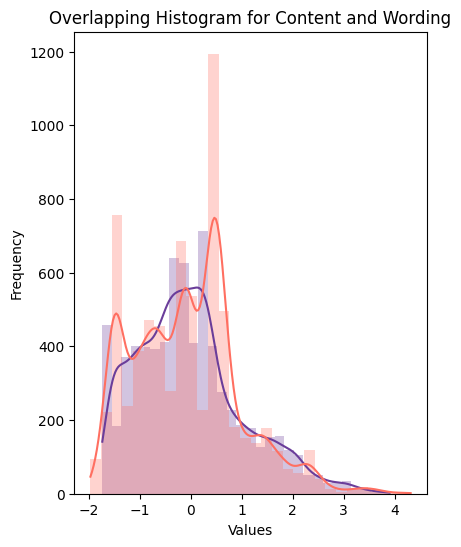

In [36]:
# Now we would try to overlap the earlier histograms and plot a generic curve for both wording and content
# This will help us further analyze how both are related and their behavior both independently and in correspondence to one another.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=merged_df, x='content', bins=30, color='#6a3d9a', alpha=0.3, label='Content', kde=True, edgecolor=None)
sns.histplot(data=merged_df, x='wording', bins=30, color='#ff6f61', alpha=0.3, label='Wording', kde=True, edgecolor=None)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Overlapping Histogram for Content and Wording')

***Observations and Inferences:*** The above plot sketches an overlapping figure for both the histograms. A key observation is that for both the metrics, the data is skewed towards the left. Also, a downward slope starts after 1. This shows that most of the students received a score between -1 to 1.

Using this plot, we can also validate the previous inference. We can clearly see that there is a strong positive correlation between the content and wording of a student's summary response. Frequency from -1 to +1 show a slight variation in linear positive correlatin values which reduces the overall correlation value. Frequency from 1 till 4 shows a near to perfect (>0.9) correlation values.

Overall, the above plot gives us a fair estimate of how both the metrics are related to each other across all prompts and helps us suggest the above discussed conclusions.

In [37]:
# We will now separate the content and wording values for each prompt id (4 total).
# This will give us an estimate of how well or worse students perform for a particular prompt
# And that if the data is spread or concentrated across a specific set of scores.
prompt_id_groups = merged_df.groupby('prompt_id')
content_data = {}
wording_data = {}
for prompt_id, group_df in prompt_id_groups:
  content_data[prompt_id] = group_df['content']
  wording_data[prompt_id] = group_df['wording']

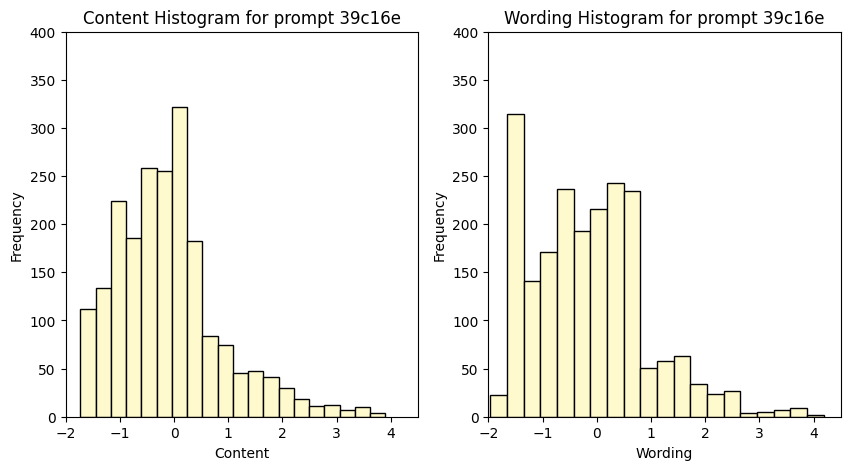

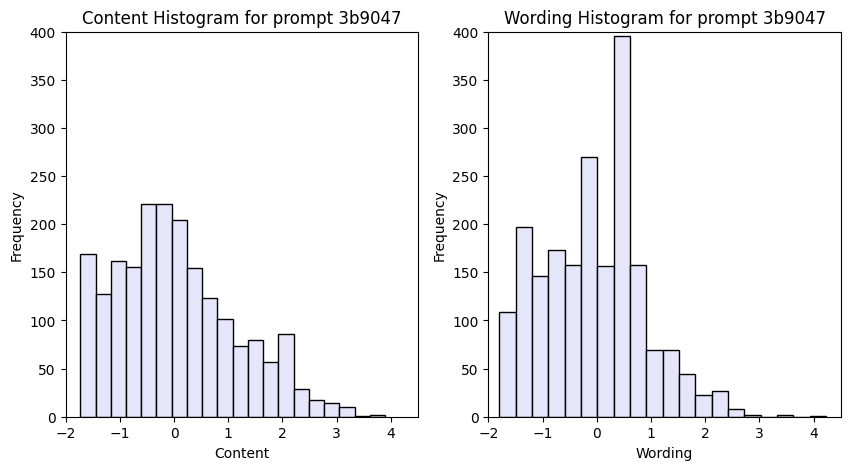

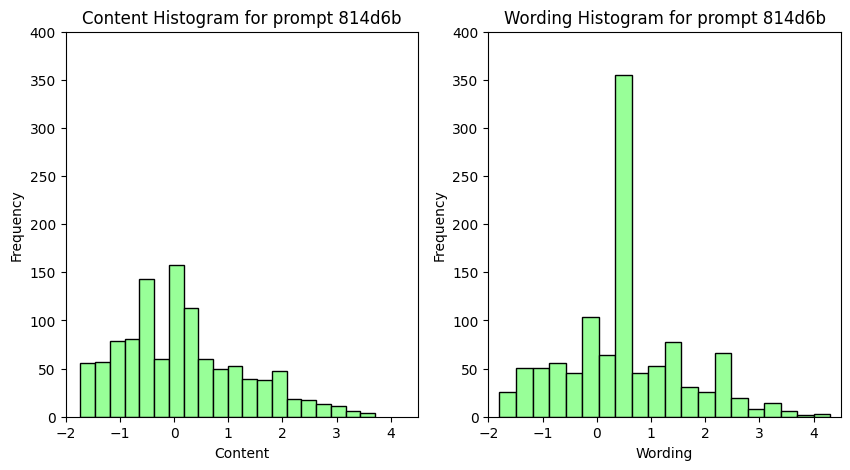

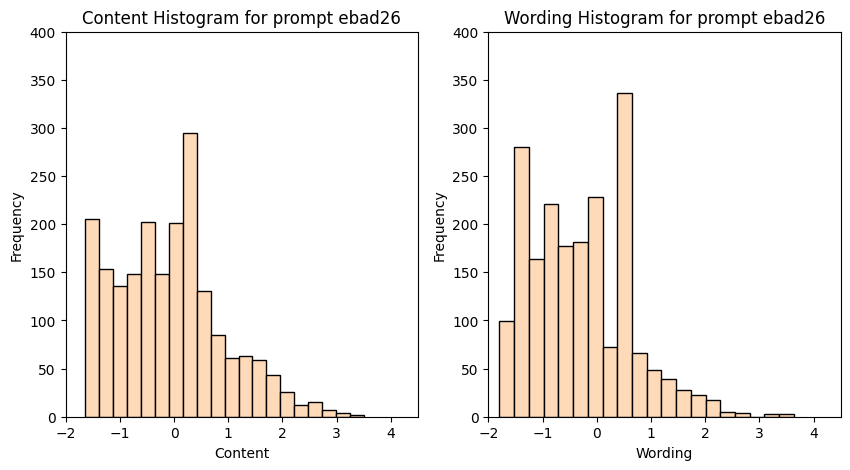

In [38]:
# After separating each prompt, we will visualize both content (left) and wording (right) side by side
# We will use different colors for different prompts for ease of visualization
colors = {"39c16e": "#FFFACD", "3b9047": "#E6E6FA", "814d6b":"#98FF98", "ebad26":"#FFDAB9"}
for prompt_id in content_data:
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.hist(content_data[prompt_id], bins=20, color=colors[prompt_id], edgecolor='black')
  plt.xlabel('Content')
  plt.ylabel('Frequency')
  plt.ylim(0, 400)
  plt.xlim(-2, 4.5)
  plt.title('Content Histogram for prompt '+ prompt_id)

  plt.subplot(1, 2, 2)
  plt.hist(wording_data[prompt_id], bins=20, color=colors[prompt_id], edgecolor='black')
  plt.xlabel('Wording')
  plt.ylabel('Frequency')
  plt.ylim(0, 400)
  plt.xlim(-2, 4.5)
  plt.title('Wording Histogram for prompt '+ prompt_id)

*The scale for both axes is standardized across all graphs.*

Prompt 1 (yellow) : Many students perform poor to around average on the wording score. Students performed average to above average in the content score. The correlation is slightly varying for scores ranging from -2 to 1. Range greater than 1 the correlation tend to be linearly positive.

Prompt 2 (Purple): Nearly 400 students scored around 0.5 for the wording section in the second prompt. Comparatively the content section is more evenly distributed.

Prompt 3 (Green): More than 350 students, which is a significant proportion of the entire population in this case, have been awarded a score of around 0.5. In general for this prompt students have scored more in the wording section than in the content section, especially by looking at the frequency in the range -1 to 1.

Prompt 4 (Peach): Students have scored nearly average or rather a bit poorly in this prompt, especially in the content metric. This illustrates how different prompts can have different impressions on the skew factor of the overall data.

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sort the merged_df by the average of 'content' and 'wording' columns
merged_df['average_score'] = (merged_df['content'] + merged_df['wording']) / 2
sorted_df = merged_df.sort_values(by='average_score', ascending=False)

# Calculate the median to split the data into good and bad essays
median_index = len(sorted_df) // 2
good_essays = sorted_df.iloc[:median_index]['text']
bad_essays = sorted_df.iloc[median_index:]['text']

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_good = tfidf_vectorizer.fit_transform(good_essays)
tfidf_matrix_bad = tfidf_vectorizer.transform(bad_essays)  # Note the use of 'transform' instead of 'fit_transform'

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate the mean TF-IDF scores for each word in good and bad essays
mean_tfidf_good = tfidf_matrix_good.mean(axis=0).tolist()[0]
mean_tfidf_bad = tfidf_matrix_bad.mean(axis=0).tolist()[0]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({'Word': feature_names,
                            'Mean_TFIDF_Good': mean_tfidf_good,
                            'Mean_TFIDF_Bad': mean_tfidf_bad})

# Identify words over-represented in good essays and under-represented in bad essays
overrepresented_good = results_df[results_df['Mean_TFIDF_Good'] > results_df['Mean_TFIDF_Bad']]
overrepresented_bad = results_df[results_df['Mean_TFIDF_Good'] < results_df['Mean_TFIDF_Bad']]

We have made use of the Term Frequency-Inverse Document Frequency (TF-IDF) method to categorize common words appearing in good and bad essays. We did so by assigning weights to words across the document. The division of essays as good and bad was done by sorting the data based on the average value of the content and wording. Then based on the meidan, the upper half of the data represented good essays and vice versa. This method helped to uncover key terms that contribute to the categorization of essays. In the end, we have a dataframe of overrepresented words, for both good and bad essays along with appropriate TF-IDF values.

## **Section 5: Three Interesting Plots (Q6, 15 points)**

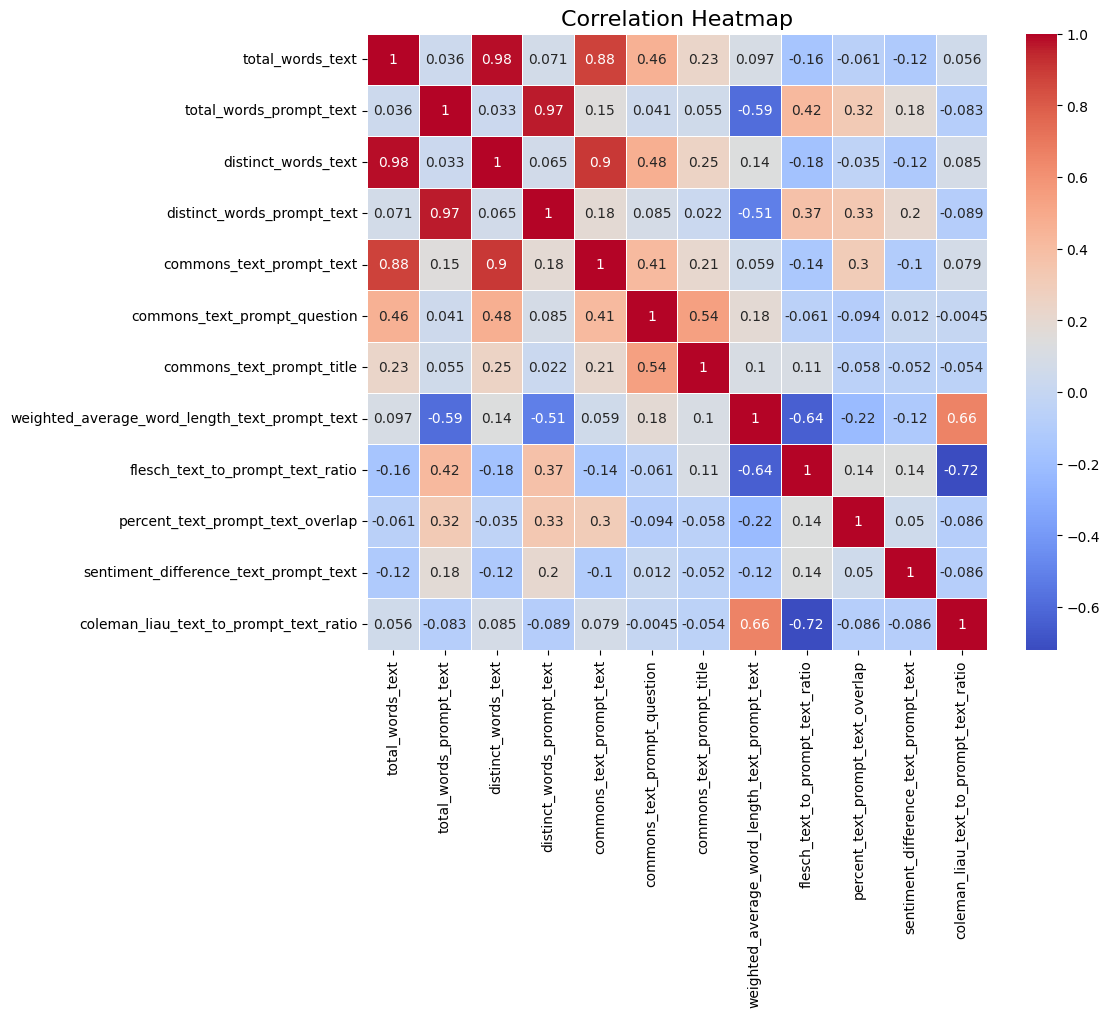

In [40]:
selected_features = [
    'total_words_text',
    'total_words_prompt_text',
    'distinct_words_text',
    'distinct_words_prompt_text',
    'commons_text_prompt_text',
    'commons_text_prompt_question',
    'commons_text_prompt_title',
    'weighted_average_word_length_text_prompt_text',
    'flesch_text_to_prompt_text_ratio',
    'percent_text_prompt_text_overlap',
    'sentiment_difference_text_prompt_text',
    'coleman_liau_text_to_prompt_text_ratio',
]
target_variable = 'content'  # Replace with your target variable

# Combine features and target variable into a new DataFrame
plot_data = feature_table[selected_features]

# Calculate the correlation matrix
correlation_matrix = plot_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

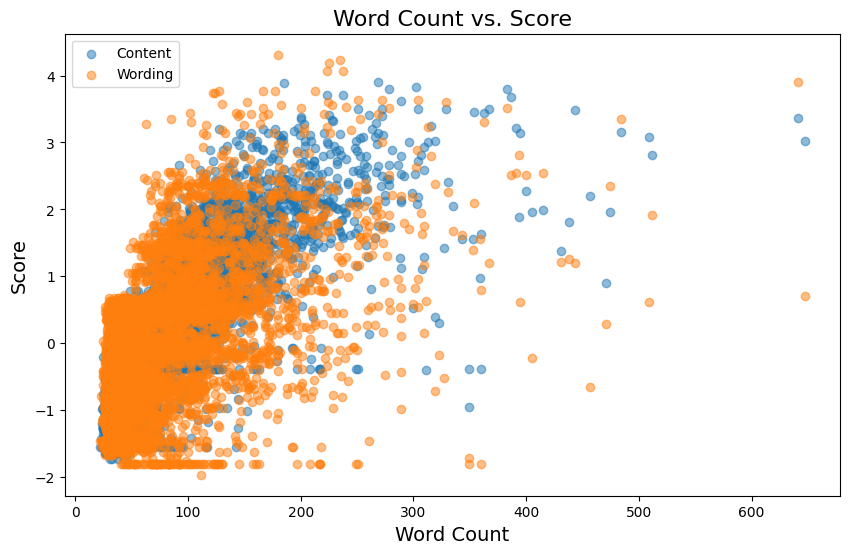

In [41]:
# Create a scatter plot to visualize the relationship between word count and scores
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['text'].str.split().apply(len), merged_df['content'], label='Content', alpha=0.5)
plt.scatter(merged_df['text'].str.split().apply(len), merged_df['wording'], label='Wording', alpha=0.5)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Word Count vs. Score', fontsize=16)
plt.legend()

# Show the plot
plt.show()

***Observations and Inferences:*** The above scatter plot compares word count to scores for both content and wording, thereby tracing patterns or correlations between essay length and quality. We have two sets of points on the y-axis - one for Content and one for the Wording. Every point on the plot represents an individual essay.

One important observation from the plot is that the content metric depends more on the essay length as compared to the wording metric. And this can very well be logically corroborated.

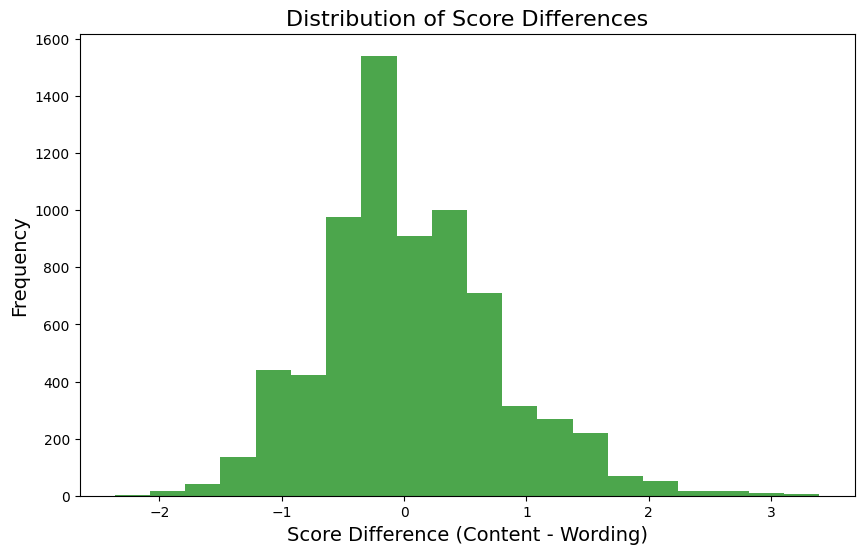

In [42]:
# Calculate score differences between 'content' and 'wording'
score_differences = merged_df['content'] - merged_df['wording']

# Create a histogram to visualize the distribution of score differences
plt.figure(figsize=(10, 6))
plt.hist(score_differences, bins=20, alpha=0.7, color='green')
plt.xlabel('Score Difference (Content - Wording)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Score Differences', fontsize=16)

# Show the plot
plt.show()

***Observations and Inferences:*** In the above difference histogram, the x-axis represents the score differences (content score - wording score). This plot provides insights into how often and to what extent content and wording scores diverge or align, offering a different perspective on the grading process. We can notice that if the histogram shows a peak or concentration of small differences around zero, it suggests that content and wording scores tend to be similar. Similary, if the histogram shows a broader distribution with scores varying significantly, it indicates that content and wording scores often differ. If we observe carefully, outliers or specific patterns in the histogram may highlight essays where content and wording scores have notable discrepancies or are consistently aligned.

## **Section 6: Baseline Model (Q7, 10 points)**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

required_features = [
    'total_words_text', 'total_words_prompt_text',
    'distinct_words_text', 'distinct_words_prompt_text',
    'commons_text_prompt_text',
    'commons_text_prompt_question',
    'commons_text_prompt_title'
]

X = feature_table[required_features]
y_content = merged_df['content']
y_wording = merged_df['wording']

# Train test split, as advised by professor would be 80:20 train to test
X_train, X_test, y_train_content, y_test_content, y_train_wording, y_test_wording = train_test_split(
    X, y_content, y_wording, test_size=0.2, random_state=12
)

# Defining separate regression model objects for content and wording
model_content = LinearRegression()
model_wording = LinearRegression()

# Fitting the model to our train data
model_content.fit(X_train, y_train_content)
model_wording.fit(X_train, y_train_wording)

# Predicting on the test dataframes
y_pred_content = model_content.predict(X_test)
y_pred_wording = model_wording.predict(X_test)

# Finally we would calculate MSE (Mean Squared Error)
mse_content = mean_squared_error(y_test_content, y_pred_content)
mse_wording = mean_squared_error(y_test_wording, y_pred_wording)

In [44]:
print(f'Mean Squared Error (Content): {mse_content:.2f}')
print(f'Mean Squared Error (Wording): {mse_wording:.2f}')

Mean Squared Error (Content): 0.33
Mean Squared Error (Wording): 0.52


Interpretation of Error Rate:

Looking at the MSE output, we can analyze how well the linear regression models are able to predict 'Content' and 'Wording' score values based on the selected
standard features. A lower MSE suggests that the model's predictions are closer to the actual scores, indicating better predictive performance. The output values are not that bad, but in the future sections we will try to improve the model performance by cleaning and processing the selected features. We can further improve the model complexity by utilizing non linear regressors and assess the model performance, comparing it with the above results.

## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

In [45]:
from scipy import stats

# We will first normalize the data using min max scaling
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

feature_table_normalized = feature_table.apply(min_max_scaling)

# We will then apply non-linear scaling (Box-Cox transformation)
def apply_box_cox(column):
    transformed, _ = stats.boxcox(column + 1)  # Adding 1 to handle zero values
    return transformed

feature_table_scaled = feature_table_normalized.apply(apply_box_cox)

# 5. Finally we would remove outliers (using z-score method)
z_scores = np.abs(stats.zscore(feature_table_scaled))
# Setting the optimum threshold value after testing
threshold = 3
feature_table_processed = feature_table_scaled[(z_scores < threshold).all(axis=1)]

In [ ]:
feature_table_processed.head()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

feature_table_processed['content'] = merged_df['content']
feature_table_processed['wording'] = merged_df['wording']

selected_features = feature_table_processed.columns.difference(['content', 'wording'])

X = feature_table_processed[selected_features]
y_content = feature_table_processed['content']
y_wording = feature_table_processed['wording']

# Train test split, as advised by professor would be 80:20 train to test
X_train, X_test, y_train_content, y_test_content, y_train_wording, y_test_wording = train_test_split(
    X, y_content, y_wording, test_size=0.2, random_state=12
)

# Defining separate regression model objects for content and wording
model_content = LinearRegression()
model_wording = LinearRegression()

# Fitting the model to our train data
model_content.fit(X_train, y_train_content)
model_wording.fit(X_train, y_train_wording)

# Predicting on the test dataframes
y_pred_content = model_content.predict(X_test)
y_pred_wording = model_wording.predict(X_test)

# Finally we would calculate MSE (Mean Squared Error)
mse_content = mean_squared_error(y_test_content, y_pred_content)
mse_wording = mean_squared_error(y_test_wording, y_pred_wording)

In [48]:
print(f'Mean Squared Error (Content): {mse_content:.2f}')
print(f'Mean Squared Error (Wording): {mse_wording:.2f}')

Mean Squared Error (Content): 0.25
Mean Squared Error (Wording): 0.43


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor for content and wording
gb_content = GradientBoostingRegressor(random_state=12)
gb_content.fit(X_train, y_train_content)
gb_wording = GradientBoostingRegressor(random_state=12)
gb_wording.fit(X_train, y_train_wording)

# Predicting on the testing data
y_pred_gb_content = gb_content.predict(X_test)
y_pred_gb_wording = gb_wording.predict(X_test)

# Calculate mean squared error for Gradient Boosting
mse_gb_content = mean_squared_error(y_test_content, y_pred_gb_content)
mse_gb_wording = mean_squared_error(y_test_wording, y_pred_gb_wording)

In [ ]:
print(f'Mean Squared Error (Gradient Boosting - Content): {mse_gb_content:.2f}')
print(f'Mean Squared Error (Gradient Boosting - Wording): {mse_gb_wording:.2f}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor for content and wording
rf_content = RandomForestRegressor(random_state=12)
rf_content.fit(X_train, y_train_content)
rf_wording = RandomForestRegressor(random_state=12)
rf_wording.fit(X_train, y_train_wording)

# Predicting on the testing data
y_pred_rf_content = rf_content.predict(X_test)
y_pred_rf_wording = rf_wording.predict(X_test)

# Calculate mean squared error for Random Forest
mse_rf_content = mean_squared_error(y_test_content, y_pred_rf_content)
mse_rf_wording = mean_squared_error(y_test_wording, y_pred_rf_wording)

In [52]:
print(f'Mean Squared Error (Random Forest - Content): {mse_rf_content:.2f}')
print(f'Mean Squared Error (Random Forest - Wording): {mse_rf_wording:.2f}')

Mean Squared Error (Random Forest - Content): 0.19
Mean Squared Error (Random Forest - Wording): 0.36


Observing both predictions and MSE values, Random Forest and Gradient Boosting are both powerful models for our task. However, it's important to note that the choice between Random Forest and Gradient Boosting depends on various factors, including the specific characteristics of our data. While Gradient Boosting may be slightly better in this case, both models provide with sufficient improvements as compared to previous benchmarks we had set earlier, thereby giving us the desired results.

## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

In [ ]:
# Optional, since facing issues on kaggle.

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):

References and Citations

1. The Data Science Design Manual, Steven Skiena
2. Documentation: Python, Numpy, Pandas, Scikit-Learn, Matplotlib, Seaborn
3. Towards Data Science Blogs (https://towardsdatascience.com/)
4. Kaggle (https://www.kaggle.com/)
5. Speaking English - How to count syllables (Youtube video) (https://www.youtube.com/watch?v=oPNAYXxxRUs)
6. Wikipedia (https://en.wikipedia.org/wiki/Readability)
7. Geeks for Geeks (https://geeksforgeeks.org/)
8. Chat gpt (https://chat.openai.com/chat)
9. w3 schools (https://www.w3schools.com/)
10. Coursera Andrew Ng Machine Learning course (https://www.coursera.org/specializations/machine-learning-introduction)
11. Machine Learning Plus (machinelearningplus.com)